In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
covid_data = pd.read_csv('covid_daily_roll.csv')
covid_data['date'] = pd.to_datetime(covid_data['date'])
policy_data = pd.read_csv("data/policies/eng-scot.csv", parse_dates=True)
policy_data['Date'] = pd.to_datetime(policy_data['Date'], format='%Y%m%d')

In [3]:
# Regression 1: Impact of reducing mask mandate
offset = 14
reg1_startdate = pd.to_datetime('2022-01-14')
#reg1_startdate = pd.to_datetime('2020-01-21')
data_reg1_y = covid_data[covid_data['date'] > reg1_startdate]
data_reg1_X = policy_data[policy_data['RegionName'] == 'England']
data_reg1_X.loc[data_reg1_X['H6_Flag'].isna(), 'nomask'] = 1
data_reg1_X['nomask'] = data_reg1_X['nomask'].fillna(0)
data_reg1_X['nomask'] = data_reg1_X['nomask'].shift(offset)
#data_reg1_X['Date'] = pd.to_datetime(data_reg1_X['Date'], format='%Y%m%d')
data_reg1_X = data_reg1_X[data_reg1_X['Date'] > reg1_startdate]
#data_reg1_X = london_covid[london_covid['date'] > pd.to_datetime('2021-01-01')]['daily_cases']
reg1_intdate = data_reg1_X[data_reg1_X['nomask'] == 1]['Date'].sort_values().iloc[0]
reg1_intdate_offset = reg1_intdate + datetime.timedelta(days=offset)
data_reg1_X = data_reg1_X[data_reg1_X['Date'] < reg1_startdate + 2 * (reg1_intdate_offset-reg1_startdate)]
data_reg1_y = data_reg1_y[data_reg1_y['date'] < reg1_startdate + 2 * (reg1_intdate_offset-reg1_startdate)]
data_reg1_X['T'] = (data_reg1_X['Date'] - reg1_intdate).dt.days - offset
data_reg1 = pd.merge(data_reg1_y, data_reg1_X, left_on='date', right_on='Date')
#reg1 = smf.glm(formula='slope ~ T*nomask', data=data_reg1)#, family=sm.families.Poisson())
reg1 = smf.glm(formula='slope_cases_roll_avg ~ T*nomask', data=data_reg1)#, family=sm.families.Poisson())
res_reg1 = reg1.fit()
print(res_reg1.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     slope_cases_roll_avg   No. Observations:                   75
Model:                              GLM   Df Residuals:                       71
Model Family:                  Gaussian   Df Model:                            3
Link Function:                 identity   Scale:                          42303.
Method:                            IRLS   Log-Likelihood:                -503.84
Date:                  Wed, 06 Apr 2022   Deviance:                   3.0035e+06
Time:                          18:07:48   Pearson chi2:                 3.00e+06
No. Iterations:                       3   Pseudo R-squ. (CS):             0.4080
Covariance Type:              nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -752.4078    153.303

/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_12674/4126788053.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg1_X.loc[data_reg1_X['H6_Flag'].isna(), 'nomask'] = 1
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_12674/4126788053.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg1_X['nomask'] = data_reg1_X['nomask'].fillna(0)
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_12674/4126788053.py:9: SettingWithCopyWarning: 
A value is trying to be set on a

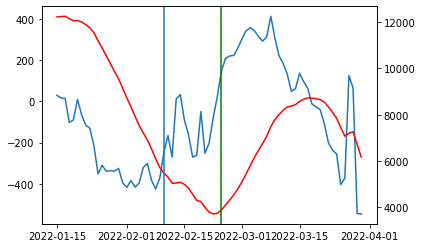

In [4]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#ax1.plot(data_reg1_y.set_index('date')['slope'])
ax1.plot(data_reg1_y.set_index('date')['slope_cases_roll_avg'])
ax2.plot(data_reg1_y.set_index('date')['cases_roll_avg'], color='red')
#data_reg1_y.set_index('date')['slope'].plot()
#data_reg1_y.set_index('date')['slope'].plot()
plt.axvline(x=reg1_intdate)
plt.axvline(x=reg1_intdate_offset, color='green')
#data_reg1_X.plot()
#data_reg1_X.set_index('Date')['nomask'].plot()

<AxesSubplot:xlabel='Date'>

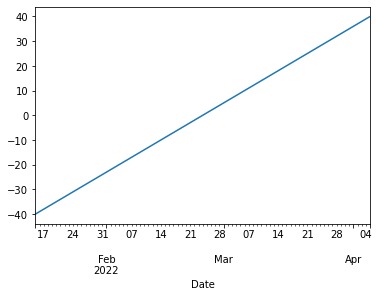

In [5]:
data_reg1_X.set_index('Date')['T'].plot()

In [6]:
# Regression 2: Impact of reducing mask mandate
offset = 7
reg2_startdate = pd.to_datetime('2022-02-20')
data_reg2_y = covid_data[covid_data['date'] > reg2_startdate]
data_reg2_X = policy_data[policy_data['RegionName'] == 'England']
data_reg2_X.loc[data_reg2_X['C1_Flag'].isna(), 'schoolopen'] = 1
data_reg2_X['schoolopen'] = data_reg2_X['schoolopen'].fillna(0)
data_reg2_X['schoolopen'] = data_reg2_X['schoolopen'].shift(offset)
data_reg2_X['Date'] = pd.to_datetime(data_reg2_X['Date'], format='%Y%m%d')
data_reg2_X = data_reg2_X[data_reg2_X['Date'] > reg2_startdate]
#data_reg2_X = london_covid[london_covid['date'] > pd.to_datetime('2021-01-01')]['daily_cases']
reg2_intdate = data_reg2_X[data_reg2_X['schoolopen'] == 1]['Date'].sort_values().iloc[0]
data_reg2_X = data_reg2_X[data_reg2_X['Date'] < reg2_startdate + 3 * (reg2_intdate-reg2_startdate)]
data_reg2_y = data_reg2_y[data_reg2_y['date'] < reg2_startdate + 3 * (reg2_intdate-reg2_startdate)]
data_reg2_X['T'] = (data_reg2_X['Date'] - reg2_intdate).dt.days - offset
data_reg2 = pd.merge(data_reg2_y, data_reg2_X, left_on='date', right_on='Date')
reg2 = smf.glm(formula='slope_cases_roll_avg ~ T*schoolopen', data=data_reg2)#, family=sm.families.Poisson())
res_reg2 = reg2.fit()
print(res_reg2.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     slope_cases_roll_avg   No. Observations:                   32
Model:                              GLM   Df Residuals:                       28
Model Family:                  Gaussian   Df Model:                            3
Link Function:                 identity   Scale:                          3555.1
Method:                            IRLS   Log-Likelihood:                -174.09
Date:                  Wed, 06 Apr 2022   Deviance:                       99541.
Time:                          18:07:49   Pearson chi2:                 9.95e+04
No. Iterations:                       3   Pseudo R-squ. (CS):             0.9999
Covariance Type:              nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      825.2416     

/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_12674/3214019769.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg2_X.loc[data_reg2_X['C1_Flag'].isna(), 'schoolopen'] = 1
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_12674/3214019769.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg2_X['schoolopen'] = data_reg2_X['schoolopen'].fillna(0)
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_12674/3214019769.py:8: SettingWithCopyWarning: 
A value is trying to

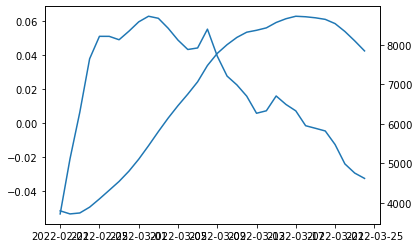

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data_reg2_y.set_index('date')['slope'])
ax2.plot(data_reg2_y.set_index('date')['cases_roll_avg'])
#data_reg2_y.set_index('date')['slope_cases_roll_avg'].plot()
#data_reg2_y.set_index('date')['cases_roll_avg'].plot()
#data_reg1_X.plot()
#data_reg1_X.set_index('Date')['T'].plot()
#data_reg2_X.set_index('Date')['schoolopen'].plot()

In [8]:
data_reg2_y.set_index('date')[['slope_cases_roll_avg', 'cases_roll_avg']]

,slope_cases_roll_avg,cases_roll_avg
date,,
2022-03-24,-254.571429,7849.571429
2022-03-23,-237.428571,8104.142857
2022-03-22,-199.571429,8341.571429
2022-03-21,-107.142857,8541.142857
2022-03-20,-39.714286,8648.285714
2022-03-19,-26.285714,8688.000000
2022-03-18,-13.142857,8714.285714
2022-03-17,62.857143,8727.428571
2022-03-16,95.000000,8664.571429


In [9]:
# Regression 3 TODO: Impact of reducing mask mandate over all time
offset = 14
#reg1_startdate = pd.to_datetime('2022-01-21')
reg1_startdate = pd.to_datetime('2020-01-21')
data_reg1_y = covid_data[covid_data['date'] > reg1_startdate]
data_reg1_X = policy_data[policy_data['RegionName'] == 'England']
data_reg1_X.loc[data_reg1_X['H6_Flag'].isna(), 'nomask'] = 1
data_reg1_X['nomask'] = data_reg1_X['nomask'].fillna(0)
data_reg1_X['nomask'] = data_reg1_X['nomask'].shift(offset)
#data_reg1_X['Date'] = pd.to_datetime(data_reg1_X['Date'], format='%Y%m%d')
data_reg1_X = data_reg1_X[data_reg1_X['Date'] > reg1_startdate]
#data_reg1_X = london_covid[london_covid['date'] > pd.to_datetime('2021-01-01')]['daily_cases']
reg1_intdate = data_reg1_X[data_reg1_X['nomask'] == 1]['Date'].sort_values().iloc[0]
data_reg1_X = data_reg1_X[data_reg1_X['Date'] < reg1_startdate + 3 * (reg1_intdate-reg1_startdate)]
data_reg1_y = data_reg1_y[data_reg1_y['date'] < reg1_startdate + 3 * (reg1_intdate-reg1_startdate)]
data_reg1_X['T'] = (data_reg1_X['Date'] - reg1_intdate).dt.days - offset
data_reg1 = pd.merge(data_reg1_y, data_reg1_X, left_on='date', right_on='Date')
reg1 = smf.glm(formula='slope ~ T*nomask', data=data_reg1)#, family=sm.families.Poisson())
res_reg1 = reg1.fit()
print(res_reg1.summary())

/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_12674/1563854825.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg1_X.loc[data_reg1_X['H6_Flag'].isna(), 'nomask'] = 1
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_12674/1563854825.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg1_X['nomask'] = data_reg1_X['nomask'].fillna(0)
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_12674/1563854825.py:9: SettingWithCopyWarning: 
A value is trying to be set on a

ValueError: zero-size array to reduction operation maximum which has no identity